In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 52.9 MB/s eta 0:00:00


In [ ]:
df = pd.read_excel('/content/taylor_swift_lyrics-_5_ (1).xlsx')
df

,Artist,Unnamed: 1,Unnamed: 2,Lyrics
0,Taylor Swift,NaN,NaN,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,NaN,NaN,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,NaN,NaN,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,NaN,NaN,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,NaN,NaN,You have a way of coming easily to me\nAnd whe...
...,...,...,...,...
127,Taylor Swift,NaN,NaN,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,NaN,NaN,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,NaN,NaN,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,NaN,NaN,Our coming of age has come and gone\nSuddenly ...


In [ ]:
import re

def clean_generated_text(text):
    """
    Cleans the generated lyrics text by removing commas, punctuation, and extra spaces.
    Keeps only words and spaces.
    """
    # Remove punctuation and special characters
    cleaned = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned


In [ ]:
df = df.drop(columns=['Unnamed: 1', 'Unnamed: 2'])
df

,Artist,Lyrics
0,Taylor Swift,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,You have a way of coming easily to me\nAnd whe...
...,...,...
127,Taylor Swift,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,Our coming of age has come and gone\nSuddenly ...


In [ ]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because",
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is",
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have",
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                       "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
                       "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
                       "she'll've": "she will have", "she's": "she is", "should've": "should have",
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                       "so's": "so as", "this's": "this is","that'd": "that would",
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
                       "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have",
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" ,
                       "Isn't":"is not", "\u200b":"", "It's": "it is","I'm": "I am","don't":"do not","did't":"did not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did",
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is", "that's": "that is" , "that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have",
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've":
                       "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                        "you'll've": "you will have", "you're": "you are", "you've": "you have",
                        "'bout": "about", "that'll": "that will", "'em": "them" }

In [ ]:
import string

# Create a translation table that maps punctuation to None, except apostrophes
punctuation_except_apostrophe = string.punctuation.replace("'", "")
translation_table = str.maketrans("", "", punctuation_except_apostrophe)

df['lyric_clean'] = df['Lyrics'].str.lower()

# Apply the translation to each lyric
df['lyric_clean'] = df['lyric_clean'].apply(lambda x: x.translate(translation_table))

for contraction, replacement in contractions.items():
    df['lyric_clean'] = df['lyric_clean'].str.replace(contraction, replacement, regex=False)

df


,Artist,Lyrics,lyric_clean
0,Taylor Swift,He said the way my blue eyes shinx\nPut those ...,he said the way my blue eyes shinx\nput those ...
1,Taylor Swift,"State the obvious, I didn't get my perfect fan...",state the obvious i did not get my perfect fan...
2,Taylor Swift,"Drew looks at me,\nI fake a smile so he won't ...",drew looks at me\ni fake a smile so he will no...
3,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",i do not know what i want so do not ask me\nbe...
4,Taylor Swift,You have a way of coming easily to me\nAnd whe...,you have a way of coming easily to me\nand whe...
...,...,...,...
127,Taylor Swift,What did you think I'd say to that?\nDoes a sc...,what did you think i would say to that\ndoes a...
128,Taylor Swift,"Keep your helmet\nKeep your life, son\nJust a ...",keep your helmet\nkeep your life son\njust a f...
129,Taylor Swift,"Betty, I won't make assumptions about why you ...",betty i will not make assumptions about why yo...
130,Taylor Swift,Our coming of age has come and gone\nSuddenly ...,our coming of age has come and gone\nsuddenly ...


In [ ]:
df_deduplicated = df.drop_duplicates(subset='lyric_clean')
df_deduplicated.shape

(132, 4)

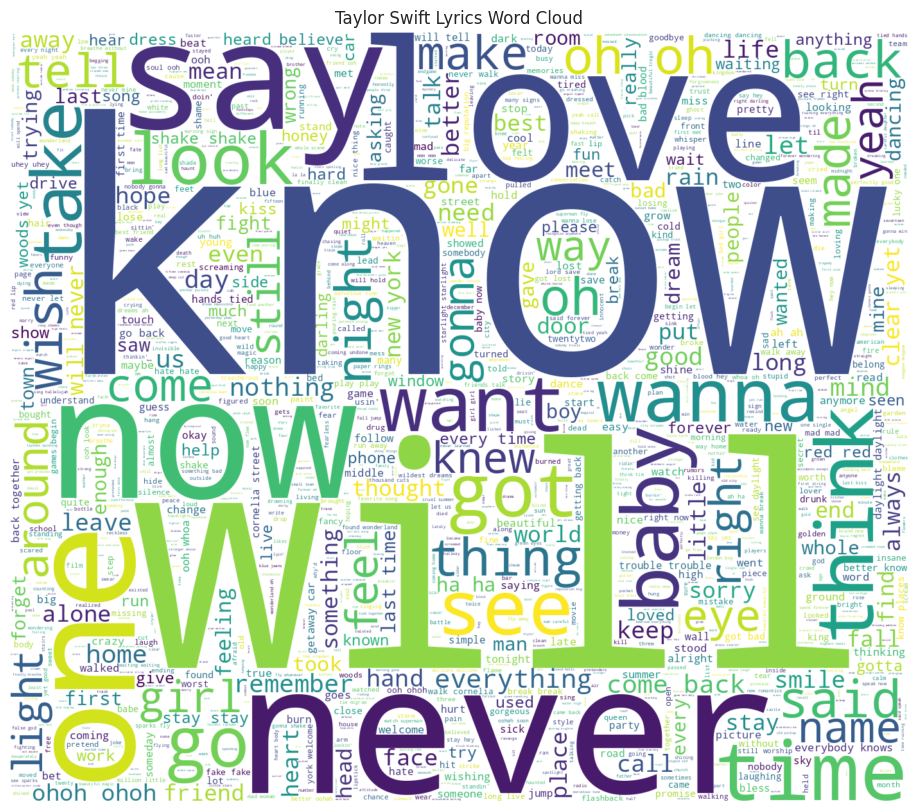

In [ ]:
lyrics_text = " ".join(lyric for lyric in df_deduplicated['lyric_clean'] if not pd.isnull(lyric))

wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    max_words=10000,
    width=1400,
    height=1200
).generate(lyrics_text)

plt.subplots(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Taylor Swift Lyrics Word Cloud')
plt.axis('off')
plt.show()


In [ ]:
lyrics_text = ' '.join(df_deduplicated['lyric_clean'].dropna())

# Split the text into words
words = lyrics_text.split()

# Filter out the stopwords
filtered_words = [word for word in words if word.lower() not in STOPWORDS]

# Counting the frequency of the remaining words
word_frequencies = Counter(filtered_words)

# Get the most common words
most_common_words = word_frequencies.most_common(10)
most_common_words

[('know', 380),
 ('will', 350),
 ('oh', 322),
 ('never', 294),
 ('love', 246),
 ('now', 244),
 ('back', 240),
 ('time', 224),
 ('one', 177),
 ('say', 176)]

In [ ]:
unique_chars = set()
df_deduplicated['lyric_clean'].dropna().apply(lambda x: unique_chars.update(set(x)))

sorted_unique_chars = sorted(list(unique_chars))

# Filtering out non-ASCII characters from the sorted list of unique characters
non_ascii_chars = [char for char in sorted_unique_chars if ord(char) > 127]

print("non-ASCII characters", non_ascii_chars)

remove_chars = ''.join(non_ascii_chars)

def remove_non_ascii(text, remove_chars):
    return ''.join(char for char in text if char not in remove_chars)

df_deduplicated.loc[df_deduplicated['lyric_clean'].notna(), 'lyric_clean'] = df_deduplicated.loc[df['lyric_clean'].notna(), 'lyric_clean'].apply(lambda x: remove_non_ascii(x, remove_chars))


non-ASCII characters ['é', 'í', 'ó']


In [ ]:
df_deduplicated = df_deduplicated.drop(columns=["word_count"])

In [ ]:
from spellchecker import SpellChecker

# Instantiate the spell checker
spell = SpellChecker()

all_words = ' '.join(df_deduplicated['lyric_clean'].dropna()).split()

# Find misspelled words
misspelled_words = spell.unknown(all_words)

misspelled_words_list = list(misspelled_words)

corrected_words = {word: spell.correction(word) for word in misspelled_words_list}
no_correction = {word: correction for word, correction in corrected_words.items() if correction is None}

no_correction


{'sainttropez': None,
 'dreamscapes': None,
 'threeyear': None,
 'eeheeheeh': None,
 'ohohoh': None,
 'shoreditch': None,
 'eightynine': None,
 'winestained': None,
 'twinsize': None,
 'buzzcut': None,
 'mirrorball': None,
 'ohohohohoh': None,
 'lovestruck': None,
 'twentyfive': None,
 'ohohahh': None,
 'selfexpression': None,
 "doctor'sofficelighting": None,
 'hideandseek': None,
 'uhuhuh': None,
 'eightyseven': None,
 'oohoohoohooh': None,
 "fireflycatchin'": None,
 'cliffside': None,
 "triptrippin'": None,
 'smalltown': None,
 'bridetobe': None,
 'highgate': None,
 'twothirty': None,
 "'45": None,
 'yeahyeah': None,
 'twentytwo': None,
 'siiiiide': None,
 'islandand': None,
 'firstglance': None,
 "skipskippin'": None,
 'ohohooh': None,
 'mindtwist': None,
 'twentyyear': None}

In [ ]:
def remove_uncorrectable_words(text):
    words = text.split()
    return ' '.join(word for word in words if word not in no_correction)

df_deduplicated['lyric_clean'] = df_deduplicated['lyric_clean'].apply(lambda x: remove_uncorrectable_words(x))
df_deduplicated = df_deduplicated[df_deduplicated['lyric_clean'].str.strip().astype(bool)]
df_deduplicated


,artist,Lyrics,lyric_clean
0,Taylor Swift,He said the way my blue eyes shinx\nPut those ...,he said the way my blue eyes shinx put those g...
1,Taylor Swift,"State the obvious, I didn't get my perfect fan...",state the obvious i did not get my perfect fan...
2,Taylor Swift,"Drew looks at me,\nI fake a smile so he won't ...",drew looks at me i fake a smile so he will not...
3,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",i do not know what i want so do not ask me bec...
4,Taylor Swift,You have a way of coming easily to me\nAnd whe...,you have a way of coming easily to me and when...
...,...,...,...
127,Taylor Swift,What did you think I'd say to that?\nDoes a sc...,what did you think i would say to that does a ...
128,Taylor Swift,"Keep your helmet\nKeep your life, son\nJust a ...",keep your helmet keep your life son just a fle...
129,Taylor Swift,"Betty, I won't make assumptions about why you ...",betty i will not make assumptions about why yo...
130,Taylor Swift,Our coming of age has come and gone\nSuddenly ...,our coming of age has come and gone suddenly t...


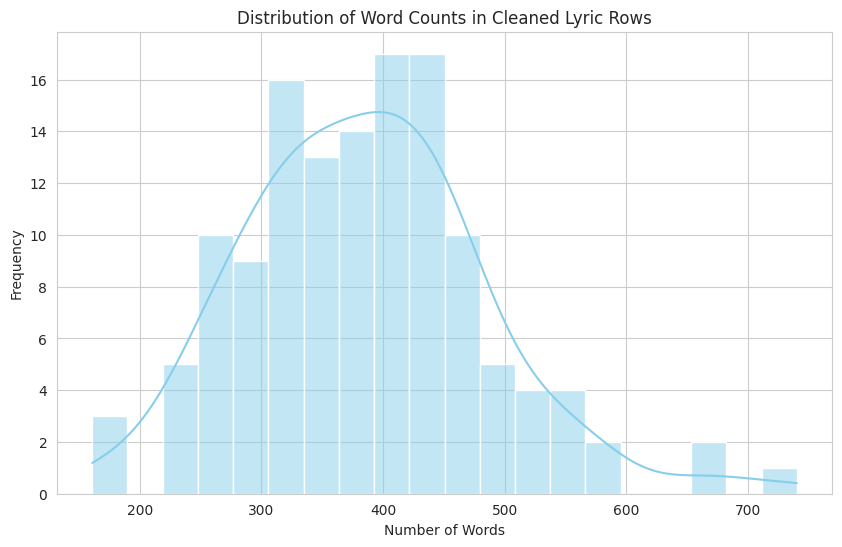

In [ ]:
df_deduplicated['word_count'] = df_deduplicated['lyric_clean'].apply(lambda x: len(x.split()))

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_deduplicated['word_count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Word Counts in Cleaned Lyric Rows')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


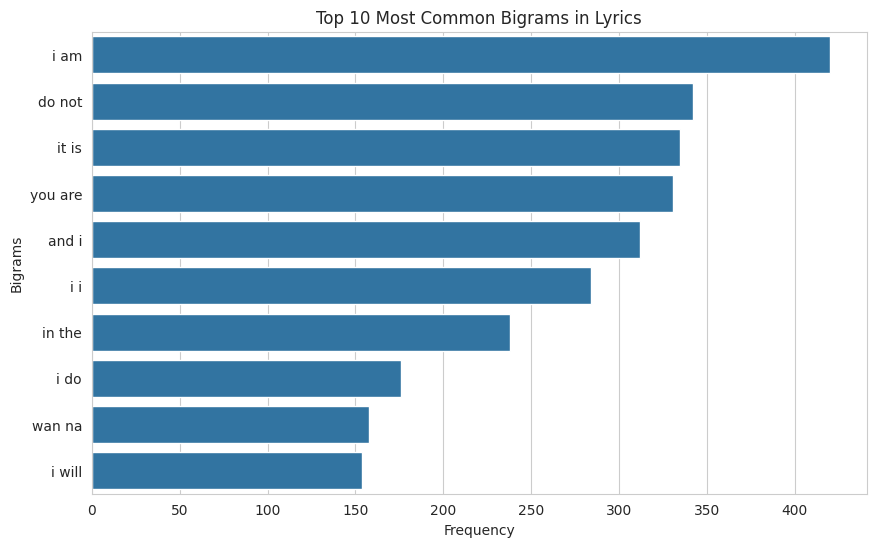

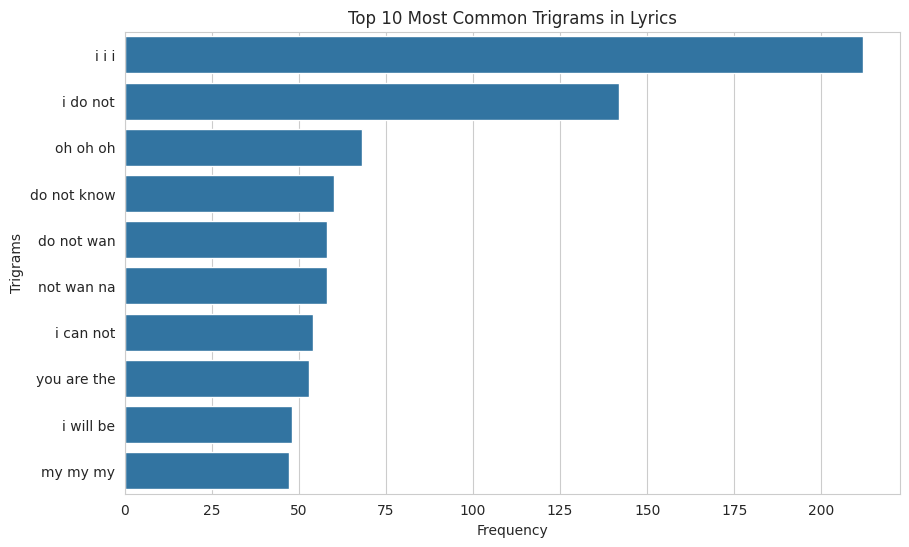

In [ ]:
import nltk
from nltk import ngrams
from collections import Counter

# Ensure you have the necessary NLTK resources
nltk.download('punkt')

# Combine all lyrics into one text
all_lyrics = ' '.join(df_deduplicated['lyric_clean'])

# Tokenize the text
words = nltk.word_tokenize(all_lyrics)

# Generate bigrams and trigrams
bigrams = ngrams(words, 2)
trigrams = ngrams(words, 3)

# Count and display the most common bigrams and trigrams
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

most_common_bigrams = bigram_counts.most_common(10)
bigram_labels = [' '.join(bigram) for bigram, count in most_common_bigrams]
bigram_values = [count for bigram, count in most_common_bigrams]

most_common_trigrams = trigram_counts.most_common(10)
trigram_labels = [' '.join(trigram) for trigram, count in most_common_trigrams]
trigram_values = [count for trigram, count in most_common_trigrams]

# Plotting the most common bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_values, y=bigram_labels)
plt.title('Top 10 Most Common Bigrams in Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


# Plotting the most common bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=trigram_values, y=trigram_labels)
plt.title('Top 10 Most Common Trigrams in Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

In [ ]:
df_deduplicated[['lyric_clean']].to_parquet("../data/cleaned.parquet", index=False)

In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs('../data', exist_ok=True)

In [ ]:
df_deduplicated[['lyric_clean']].to_parquet(r"C:\Users\HP\Downloads\cleaned.parquet", index=False)